In [1]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns

# Footwear
The given dataset contains the profits generated(in %) by all the suppliers of a footwear company in 4 major cities of India - Delhi, Mumbai, Jaipur and Hyderabad. The company wants to invest more money in the city that is showing the most promise. Analyse the dataset and answer the following questions.

In [2]:
#loading data
df=pd.read_csv("Footwear_v2.csv")

In [3]:
df.head()

,Supplier,Delhi,Mumbai,Jaipur,Hyderabad
0,Supplier 1,4.57%,4.18%,7.90%,8.54%
1,supplier 2,2.60%,1.88%,8.99%,9.23%
2,supplier 3,2.26%,7.48%,6.71%,7.84%
3,supplier 4,6.47%,6.70%,7.94%,9.89%
4,supplier 5,6.82%,1.17%,8.54%,5.67%


In [4]:
#we note that there are no null values, and the values are treated as objects and not floats, we will have to clean the 
# '%' sign at the end of all and change it to float
#we will write a function to do this like the last session
def clean(string):
    clean="".join(filter(lambda x: x!='%', string))
    return float(clean)

# you can also use replace
# def clean(val):
#    return float(val.replace("%",""))
#

In [5]:
# we also see the supplier column has few 'S' as upper case and few lowercase
#lets clean that too
def supply_cleaner(string):
    return string.lower()

In [6]:
#clean the df
df['Supplier']=df['Supplier'].apply(supply_cleaner)
df['Mumbai']=df['Mumbai'].apply(clean)
df['Delhi']=df['Delhi'].apply(clean)
df['Jaipur']=df['Jaipur'].apply(clean)
df['Hyderabad']=df['Hyderabad'].apply(clean)

## 1. Average
Q1)The absolute difference in the average profit percentages of Delhi and Mumbai comes out to be approximately ____

a) 1.67

b) 1.57

c) 1.77

d) 1.47


In [7]:
#Your code here
df.describe()

,Delhi,Mumbai,Jaipur,Hyderabad
count,30.000000,30.000000,30.000000,30.000000
mean,6.324000,4.555000,7.695667,7.727667
std,2.095982,2.519117,1.586503,2.477642
min,2.260000,0.290000,3.400000,1.370000
25%,5.237500,2.432500,7.017500,6.110000
50%,6.000000,4.020000,7.920000,8.305000
75%,6.782500,6.335000,8.980000,9.135000
max,11.960000,9.850000,9.870000,12.310000


## 2. Invest More
Q2) Which city amongst the four should the company invest more money in?

Hint: You need to see which city is showing most consistency in profits

a) Delhi

b) Mumbai

c) Jaipur

d) Hyderabad



<AxesSubplot:>

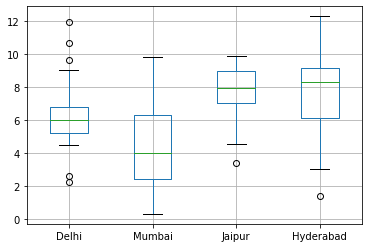

In [8]:
#Your code here
sub_df=df[['Delhi', 'Mumbai', 'Jaipur', 'Hyderabad']]
sub_df.boxplot()

# Crypto Currencies

The following datasets contain the prices of some popular cryptocurrencies such as bitcoin, litecoin, ethereum, monero, neo, quantum and ripple.Now, you would like to know how the prices of these currencies vary with each other.

The datasets containing their price values over several days is mentioned. The attributes are as follows:

- Date - The date of trading
- Open - Opening Price
- High - Highest Price
- Low - Lowest Price
- Close - Closing Price
-  Volume - Total Volume
- Market Cap- Market Capitalisation




In [9]:
bitcoin = pd.read_csv("crypto_data/bitcoin_price.csv")
ethereum = pd.read_csv("crypto_data/ethereum_price.csv")
litecoin = pd.read_csv("crypto_data/litecoin_price.csv")
monero = pd.read_csv("crypto_data/monero_price.csv")
neo = pd.read_csv("crypto_data/neo_price.csv")
qtum = pd.read_csv("crypto_data/qtum_price.csv")
ripple = pd.read_csv("crypto_data/ripple_price.csv")
print("Bitcoin: ", bitcoin.shape)
print("Ethereum: ", ethereum.shape)
print("Litecoin: ", litecoin.shape)
print("Monero: ", monero.shape)
print("Neo: ", neo.shape)
print("Qtum: ", qtum.shape)
print("Ripple: ", ripple.shape)

Bitcoin:  (1655, 7)
Ethereum:  (824, 7)
Litecoin:  (1655, 7)
Monero:  (1266, 7)
Neo:  (425, 7)
Qtum:  (168, 7)
Ripple:  (1557, 7)


In [10]:
bitcoin = pd.concat([bitcoin.Date, bitcoin.Close], axis=1)
ethereum = pd.concat([ethereum.Date, ethereum.Close], axis=1)
litecoin = pd.concat([litecoin.Date, litecoin.Close], axis=1)
monero = pd.concat([monero.Date, monero.Close], axis=1)
neo = pd.concat([neo.Date, neo.Close], axis=1)
qtum = pd.concat([qtum.Date, qtum.Close], axis=1)
ripple = pd.concat([ripple.Date, ripple.Close], axis=1)

In [11]:
data_frames = [ethereum, litecoin, monero, neo, qtum, ripple]
crypto_coins = bitcoin
for df in data_frames:
    crypto_coins = pd.merge(crypto_coins, df, on="Date", how="inner")
crypto_coins.columns = ["Date", "bitcoin", "ethereum", "litecoin", "monero", "neo", "qtum", "ripple"]
crypto_coins.head()

,Date,bitcoin,ethereum,litecoin,monero,neo,qtum,ripple
0,"Nov 07, 2017",7144.38,294.66,61.30,99.76,26.23,11.21,0.210354
1,"Nov 06, 2017",7022.76,298.89,55.17,102.92,26.32,10.44,0.205990
2,"Nov 05, 2017",7407.41,296.26,54.75,86.35,26.38,10.13,0.202055
3,"Nov 04, 2017",7379.95,300.47,55.04,87.30,26.49,10.05,0.203750
4,"Nov 03, 2017",7207.76,305.71,56.18,87.99,26.82,10.38,0.208133


## 1. Correct Statements
Q1) Combine all the datasets by merging on the date column and create a dataframe with only the closing prices for all the currencies. Next, create a pair plot with all these columns and choose the correct statements from the given ones:

I)There is a good trend between litecoin and monero, one increases as the other

II)There is a weak trend between bitcoin and neo.

a)I

b)II

c)Both I and II

d)None of the above.


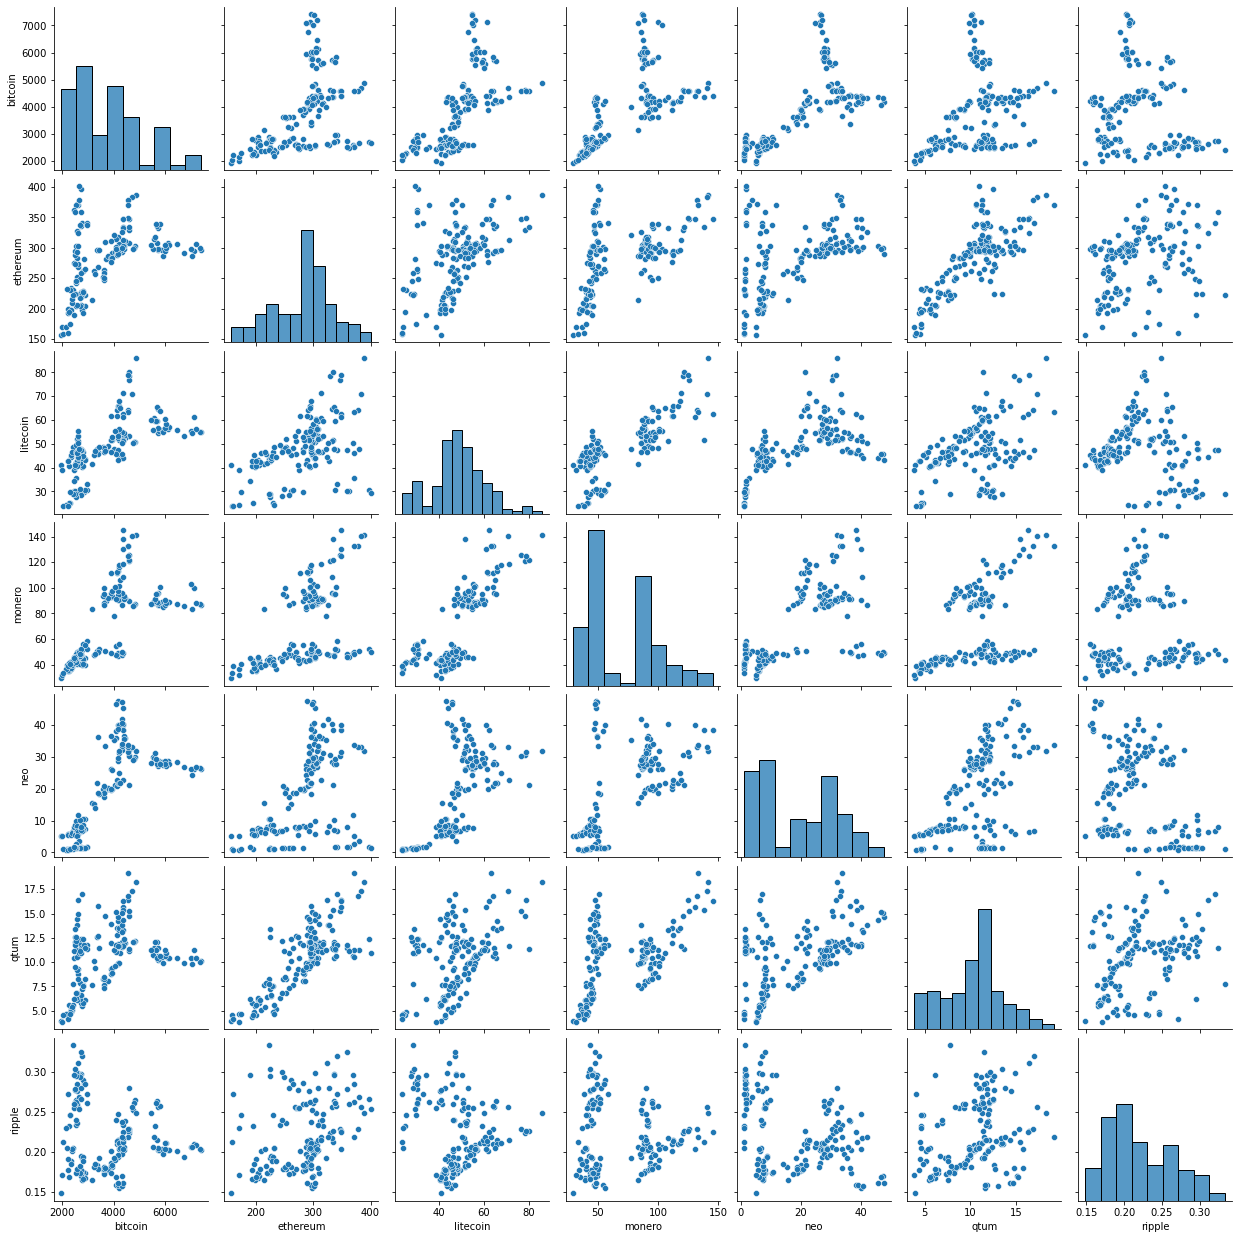

In [12]:
#Your code here
sns.pairplot(crypto_coins)

## Heatmap
Q2)As mentioned earlier, Heat Maps are predominantly utilised for analysing Correlation Matrix. A high positive correlation (values near 1) means a good positive trend - if one increases, then the other also increases. A negative correlation on the other hand(values near -1) indicate good negative trend - if one increases, then the other decreases. A value near 0 indicates no correlation, as in one variable doesn’t affect the other. 


a)Ethereum and Quantum have high correlation 

b)Neo and Bitcoin have pretty low correlation

c)Ethereum has similar correlation with litecoin and neo



<AxesSubplot:>

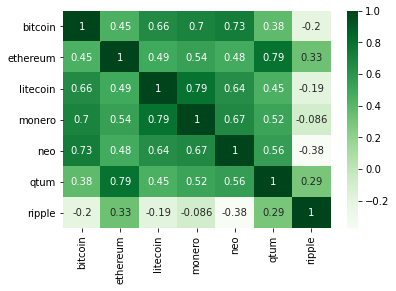

In [13]:
#Your code here
crypto_corr = crypto_coins.corr()
sns.heatmap(crypto_corr,cmap="Greens", annot=True)